# Introduction:

## Notebook explores the process of calculating local extremas for:
#### pattern recognition
#### support/resistance levels
##### ML feature engineering



In [1]:

import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from binance.client import Client
import os
#using a data read only api key/ switch to reading from encrypted file for security later
api_key = 'XuozVlFg2WYVemwmHMqCK9j5jSYIV1z3MoDAXY76X2JiCbbgcw7dGxvE0eGVsqhH'
secret_key = 'WyWBCdczLCFvV8fKy16R5dOwhhjK31T7ZrW0cplIzjrvmlSPh5E1KEeAEh5c9I6s'

#initialize binance api client
client = Client(api_key, secret_key)

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [2]:
# locate and sort local portfolios
# later update to functions for freq port rather than bw port
port_folder = '/home/me/Documents/BWA/portfolios/'
port_folder_list = os.listdir(port_folder)
port_folder_list.sort()
last_port = port_folder_list[len(port_folder_list)-1]
#print(port_folder+last_port+'/portfolio')
bw_portfolio = pd.read_csv(port_folder+last_port+'/buywall/portfolio')
bw_portfolio.columns = ['Coin','Weight %','Price','avg_returns','cum_returns','pct_returns']
bw_portfolio

,Coin,Weight %,Price,avg_returns,cum_returns,pct_returns
0,WAVESBTC,10.745562,0.000330,0.000117,0.087365,0.065611
1,DNTBTC,10.442033,0.000003,-0.000022,-0.033039,-0.087379
2,SNMBTC,10.321087,0.000006,-0.000235,-0.199462,-0.163237
3,VIABTC,10.287537,0.000091,-0.000162,-0.145365,-0.220890
4,BQXBTC,10.276146,0.000046,-0.000166,-0.146153,-0.186886
5,AEBTC,10.236188,0.000132,-0.000190,-0.163715,-0.104478
6,KMDBTC,10.235526,0.000148,-0.000218,-0.184855,-0.129924
7,MODBTC,10.219473,0.000100,-0.000171,-0.149385,-0.185094
8,NASBTC,10.176118,0.000200,-0.000161,-0.140029,-0.152183
9,BTGBTC,10.094134,0.002949,-0.000034,-0.033192,-0.039414


## Get portfolios and historical data

WAVESBTC
636


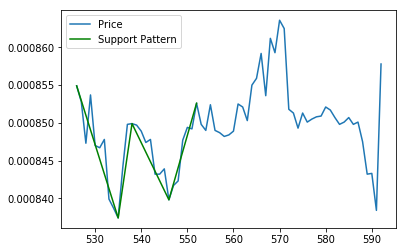

next sym
DNTBTC
636
next sym
SNMBTC
636
next sym
VIABTC
636
next sym
BQXBTC
636
next sym
AEBTC
636
next sym
KMDBTC
636
next sym
MODBTC
636
next sym
NASBTC
636
next sym
BTGBTC
636


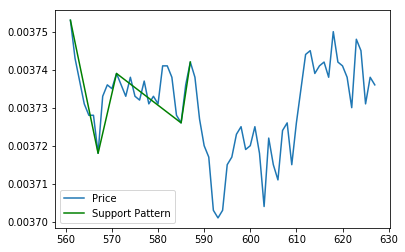

next sym


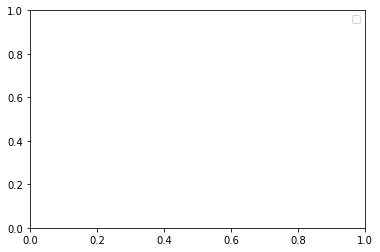

In [3]:
#tolerance for extrema values
tol = 20.0/100
#loop through coin in portfolio
for coin in bw_portfolio["Coin"]:
    print(coin)
    #Download hist data update with funtion for specific timeframe
    data = client.get_historical_klines(coin,client.KLINE_INTERVAL_5MINUTE,'2 days ago')
    data = pd.DataFrame(data,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote volume','Num trades', 'btc buys', 'coin buys', 'ignore'])
    #data = data.fillna(method='ffill')
    # convert from millesecond time to datetime for potential resampling and readability
    data['Open time'] = data['Open time']/1000
    data['Open time'] = data['Open time'].astype('datetime64[s]')
    data = data.set_index('Open time')
    data = data[['Open','High','Low','Close','Volume']].astype(float)
    #data = data.drop_duplicates()
    #get price
    test_len = int(len(data)-150)
    price = data.Close.copy()
    print(len(price))
    #get extremas without looking into 'future'
    #update to use given lookback
    for i in range(500,len(price)):
        #max extrema
        max_i = list(argrelextrema(price.values[:i],np.greater,order=5)[0])
        #min extrema
        min_i = list(argrelextrema(price.values[:i],np.less,order=5)[0])
        idx = max_i+min_i+[len(price.values[:i])-1]
        idx.sort()
        #pattern
        #current index is data up to 5 values before the end of the list
        current_idx = idx[-5:]
        current_pat = price.values[current_idx]
        start = min(current_idx)
        end = max(current_idx)
        #find pattern
        XA = current_pat[1]-current_pat[0]
        AB = current_pat[2]-current_pat[1]
        BC = current_pat[3]-current_pat[2]
        CD = current_pat[4]-current_pat[3]
        #price range for patterns with tolerance
        try:
            #bullish gartley
            if (XA>0 and AB<0 and BC>0 and CD<0):
                AB_range = np.array([0.618-tol,0.618+tol])*abs(XA)
                BC_range = np.array([0.382-tol,0.886+tol])*abs(AB)
                CD_range = np.array([1.27-tol,1.618+tol])*abs(BC)
                
                #
                plt.legend(["Price","Resistance Pattern"])
                if(AB_range[0]<abs(AB)<AB_range[1])and (BC_range[0]<abs(BC)<BC_range[1])and (CD_range[0]<abs(CD)<CD_range[1]):
                    plt.plot(np.arange(start,i+40),price.values[start:i+40])
                    plt.plot(current_idx,current_pat,color='red')
                    plt.legend(["Price","Resistance Pattern"])
                    plt.show()
            elif (XA<0 and AB>0 and BC<0 and CD>0):
                AB_range = np.array([0.618-tol,0.618+tol])*abs(XA)
                BC_range = np.array([0.382-tol,0.886+tol])*abs(AB)
                CD_range = np.array([1.27-tol,1.618+tol])*abs(BC)
                if(AB_range[0]<abs(AB)<AB_range[1])and (BC_range[0]<abs(BC)<BC_range[1])and (CD_range[0]<abs(CD)<CD_range[1]):
                    plt.plot(np.arange(start,i+40),price.values[start:i+40])
                    plt.plot(current_idx,current_pat,color='green')
                    plt.legend(["Price","Support Pattern"])
                    plt.show()
        except Exception as e:
            print(e)
    cont = input("next sym")
    if(cont=='n'):
        break